Assignment 2

Q2

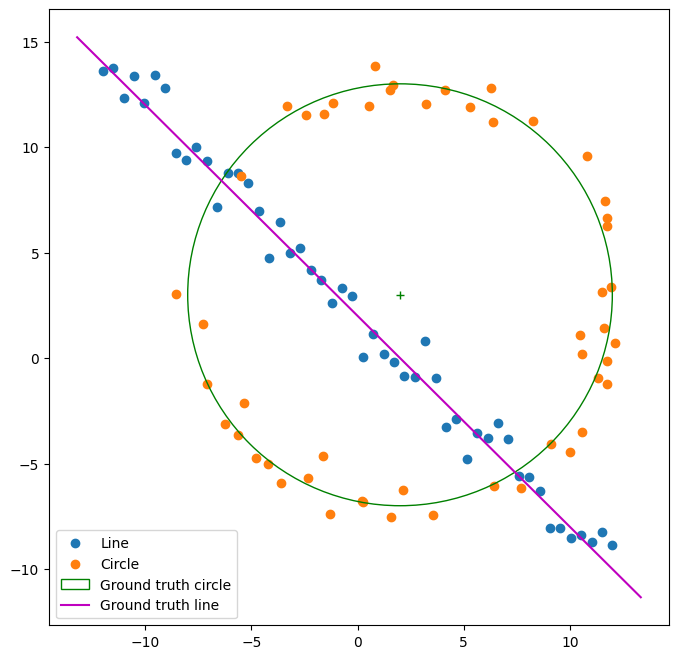

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import tikzplotlib

# np.random.seed(0)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))  # All points

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')
plt.legend()


plt.show()


Q3

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

corners = []

def click_event(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append([x, y])
        cv.circle(img, (x, y), 5, (0, 0, 255), -1)
        cv.imshow('image', img)
        
        if len(corners) == 4:
            cv.destroyAllWindows()

img = cv.imread('building.png')
cv.imshow('image', img)
cv.setMouseCallback('image', click_event)

cv.waitKey(0)

print(corners)

[[37, 72], [92, 72], [93, 108], [37, 111]]


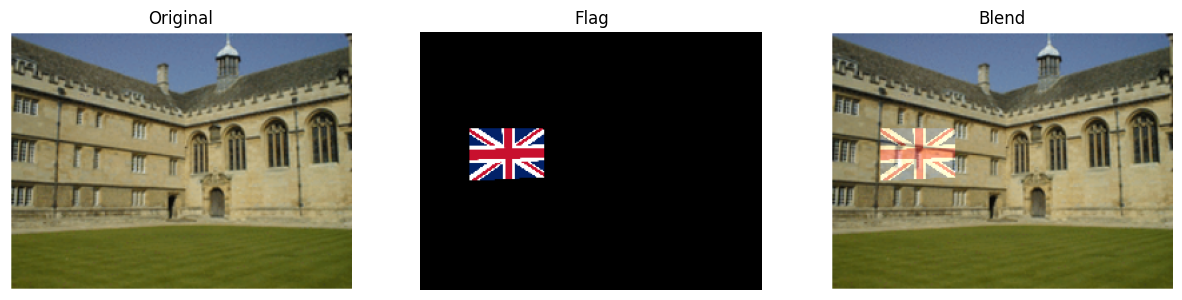

In [56]:
flag = cv.imread('uk_flag.png')
img2 = cv.imread('building.png')

rows, cols, ch = flag.shape
pts1 = np.float32(corners)
pts2 = np.float32([[0, 0], [cols, 0], [cols, rows], [0, rows]])

h = cv.findHomography(pts2, pts1)[0]
warped_flag = cv.warpPerspective(flag, h, (img.shape[1], img.shape[0]))

result = cv.addWeighted(img2, 1, warped_flag, 0.4, 0, dst=img)

warped_flag = cv.cvtColor(warped_flag, cv.COLOR_BGR2RGB)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1, 3, figsize=(15, 8))


ax[0].imshow(img2),ax[0].set_title('Original'),ax[0].axis('off')
ax[1].imshow(warped_flag),ax[1].set_title('Flag'),ax[1].axis('off')
ax[2].imshow(result),ax[2].set_title('Blend'),ax[2].axis('off')

plt.show()